# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

def calc_slope(xs,ys):
    nominator = np.mean(xs) * np.mean(ys) - np.mean(xs * ys)
    denominator = (np.mean(xs)) ** 2 - np.mean(xs ** 2)
    return round(nominator/denominator, 2)

def best_fit(xs,ys):
    m = calc_slope(xs, ys)
    c = round(np.mean(ys) - (m * np.mean(xs)), 2)
    return m, c

def reg_line(m, c, xs):
    y_vector = np.empty((0, len(xs)))
    for x in xs:
        y = (m * x) + c
        y_vector = np.append(y_vector, [y])
    return y_vector

def r_squared(y_real, y_predicted):
    nominator = np.sum(a = ((y_real - y_predicted) ** 2))
    denominator = np.sum(a = ((y_real - np.mean(y_real)) ** 2))
    return round ((1 - (nominator/denominator)), 2)

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)
m, c = best_fit(X, Y)
reg_line = reg_line(m, c, X)

In [6]:
r = r_squared(Y, reg_line)

In [7]:
print(f"""
Slope: {m}
Y-Intercept: {c}
R-Squared: {r}
Model: Y = {m} * X + {c}
""")


Slope: 0.56
Y-Intercept: 6.32
R-Squared: 0.97
Model: Y = 0.56 * X + 6.32



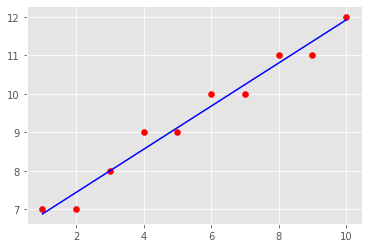

In [9]:
plt.scatter(X, Y, color = "red")
plt.plot(X, reg_line, color = "blue")

In [ ]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [11]:
def model(x):
    y = m * x + c
    return y

y = model(4.5)

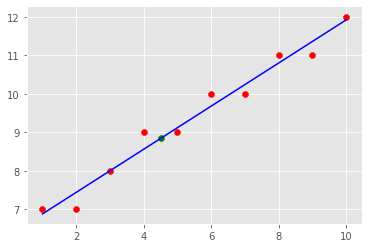

In [12]:
plt.scatter(X, Y, color = "red")
plt.plot(X, reg_line, color = "blue")
plt.scatter(4.5, y, color = "green")

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [14]:
import pandas as pd 
df = pd.read_csv("heightweight.csv")

In [15]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [23]:
height = df['height'].to_numpy()
height

array([68, 71, 61, 69, 71, 58, 72, 73, 58, 74, 61, 59, 69, 68, 64, 69, 72,
       66, 65, 69])

In [24]:
weight = df['weight'].to_numpy()
weight

array([165, 201, 140, 170, 192, 125, 195, 205, 115, 210, 135, 125, 172,
       175, 145, 170, 200, 155, 150, 171])

In [26]:
m_health, c_health = best_fit(height, weight)

In [27]:
m_health, c_health

(5.54, -204.55)

In [36]:
y_vector = np.empty((0, len(height)))
for x in height:
    y = m_health * x + c_health
    y_vector = np.append(y_vector, [y])

In [37]:
r_squared(weight, y_vector)

0.96

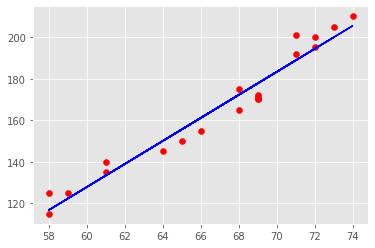

In [38]:
plt.scatter(height, weight, color = "red")
plt.plot(height, y_vector, color = "blue")

In [40]:
val = input("Enter your height: ") 
weight = m_health * int(val) + c_health
print(f"Your predicted weight is {weight}")

Enter your height: 50
Your predicted weight is 72.44999999999999
